In [184]:
import pyprind
import pandas as pd
from string import punctuation
import re
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

df = pd.read_csv('IMDB Dataset.csv.zip', encoding='utf-8')

In [185]:
# In order to prepare the dataset, we need to convert text data into integers(encodings). To do that, we must find the unique words.
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [186]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [187]:
# Split into train,validation, and test 

X_data = df['review']
y_data = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0)

In [188]:
total_words = 5000
max_length = 500

In [189]:
tokenizer = Tokenizer(num_words=total_words,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [190]:
len(tokenizer.word_index)

90644

In [191]:
# Tokenizer
train_seq = tokenizer.texts_to_sequences(X_train)
#padding
train_padd = pad_sequences(train_seq,maxlen=max_length,truncating='post')

In [192]:
# Tokenizer
test_seq = tokenizer.texts_to_sequences(X_test)
#padding
test_padd = pad_sequences(test_seq,maxlen=max_length,truncating='post')

In [193]:
max_seq_len = max([len(x) for x in train_padd])
max_seq_len

500

In [203]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('length less than %s into percentage: %s'%(max_len, (count / len(nested_list))*100))
max_len = 500
below_threshold_len(max_len, train_seq)

length less than 500 into percentage: 92.012


In [194]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM

embedding_dim=16

# Model
model = Sequential()
model.add(Embedding(total_words,embedding_dim,input_length =max_length))
model.add(layers.LSTM(16))
model.add(Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 16)           80000     
                                                                 
 lstm_5 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 flatten_5 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 82689 (323.00 KB)
Trainable params: 8268

In [196]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
 
history = model.fit(train_padd, y_train, epochs=10, batch_size=128, validation_data=(test_padd,y_test))

Epoch 1/10


196/196 [==============================] - 31s 124ms/step - loss: 0.5306 - accuracy: 0.7357 - val_loss: 0.3264 - val_accuracy: 0.8662
Epoch 2/10
196/196 [==============================] - 25s 127ms/step - loss: 0.2857 - accuracy: 0.8896 - val_loss: 0.3012 - val_accuracy: 0.8731
Epoch 3/10
196/196 [==============================] - 24s 120ms/step - loss: 0.2314 - accuracy: 0.9160 - val_loss: 0.3014 - val_accuracy: 0.8804
Epoch 4/10
196/196 [==============================] - 26s 135ms/step - loss: 0.2084 - accuracy: 0.9256 - val_loss: 0.3033 - val_accuracy: 0.8754
Epoch 5/10
196/196 [==============================] - 24s 122ms/step - loss: 0.1860 - accuracy: 0.9348 - val_loss: 0.3167 - val_accuracy: 0.8780
Epoch 6/10
196/196 [==============================] - 26s 133ms/step - loss: 0.1654 - accuracy: 0.9427 - val_loss: 0.3576 - val_accuracy: 0.8691
Epoch 7/10
196/196 [==============================] - 23s 119ms/step - loss: 0.1506 - accuracy: 0.9471 - val_loss: 0.3481 - val_

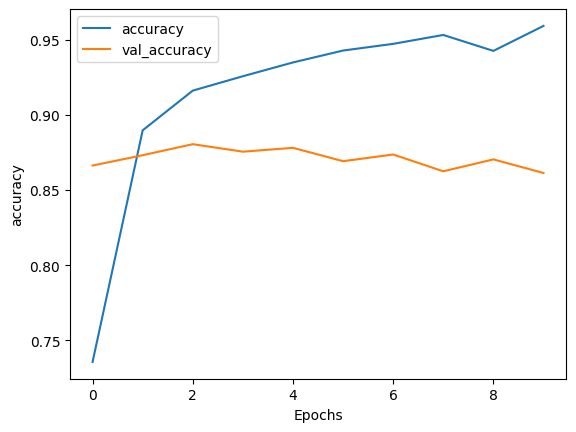

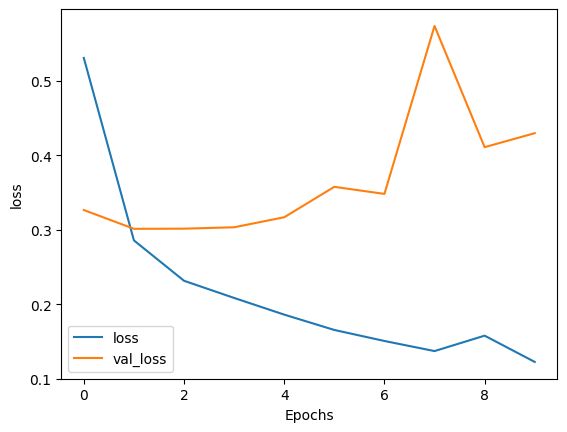

In [197]:
def plot_graphs(history, string):
        plt.plot(history.history[string])
        plt.plot(history.history['val_'+string])
        plt.xlabel("Epochs")
        plt.ylabel(string)
        plt.legend([string, 'val_'+string])
        plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [198]:
model.evaluate(test_padd,y_test)

782/782 [==============================] - 16s 21ms/step - loss: 0.4296 - accuracy: 0.8613


[0.42963093519210815, 0.8612800240516663]